# Data Analytics Challenge: Explore Uber's Ride Data
Experimenting with Uber's ride data. In an effort to find trends and new anomalies.

In [26]:
import pandas as pd
import numpy as np

In [4]:
datasets = ['boston-censustracts-2017-3-All-HourlyAggregate.csv','cincinnati-censustracts-2017-3-All-HourlyAggregate.csv'
            ,'san_francisco-censustracts-2017-3-All-HourlyAggregate.csv','washington_DC-censustracts-2017-3-All-HourlyAggregate.csv']
path = '/Users/ahmed/PycharmProjects/UberRidesDataset/US_Uber_Dataset_2017_3/'

# Features

In [152]:
df = pd.read_csv(path+datasets[0])
print(list(df.columns))
print(df.shape)

['sourceid', 'dstid', 'hod', 'mean_travel_time', 'standard_deviation_travel_time', 'geometric_mean_travel_time', 'geometric_standard_deviation_travel_time']
(3969647, 7)


In [6]:
# print(df.columns)
# print(df.head(20))
sourceIDs = set(df['sourceid'])
destinationIDS = set(df['dstid'])

# print('unique sources',sourceIDs)
# print('unique destinations',destinationIDS)
# print('destinations - sources=', (destinationIDS-sourceIDs))
# print('sources - destinations=', (sourceIDs-destinationIDS))
# print(max(list(df['hod'])), min(list(df['hod'])))
# print('shape', df.shape)
# print('duplicates',len(df[['sourceid','dstid']].drop_duplicates()), len(df[['sourceid','dstid']]) )
# #print(df[['sourceid','dstid']])

# Sample Data


In [44]:
df.head(10)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3,5,2,754.92,205.90,729.05,1.30
1,3,5,8,1150.56,224.99,1127.78,1.22
2,3,5,14,1170.89,386.66,1124.12,1.31
3,3,5,20,1079.73,300.91,1039.29,1.32
4,5,3,2,884.25,159.89,871.05,1.19
5,5,3,8,1252.96,642.41,1167.82,1.39
6,5,3,14,1313.62,304.96,1286.23,1.21
7,5,3,20,1074.71,215.79,1055.86,1.20
8,1,12,0,290.76,212.41,233.96,1.90
9,1,12,6,222.07,167.43,170.40,2.36


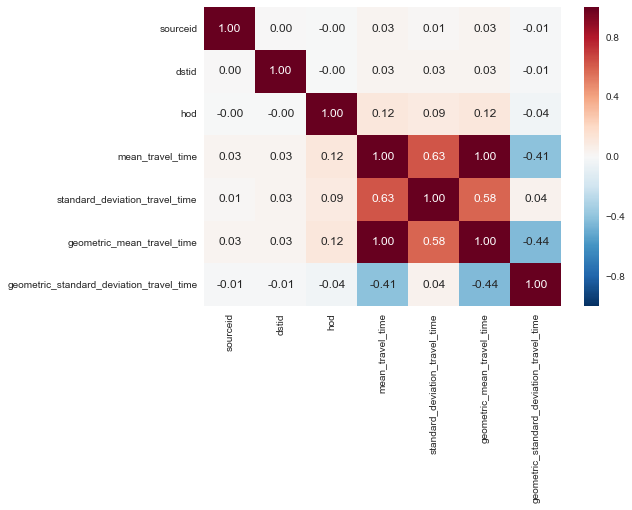

In [8]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, fmt=".2f")

plt.show()

# Histograms
* Hour of Day
* Source ID
* Destination ID
* Mean Travel Time

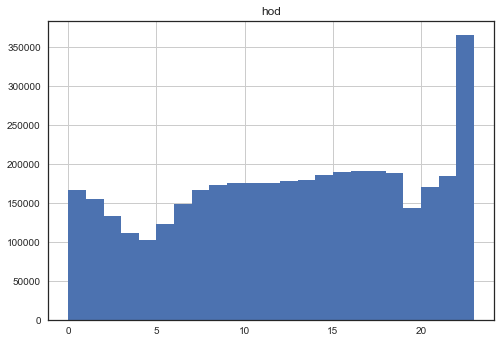

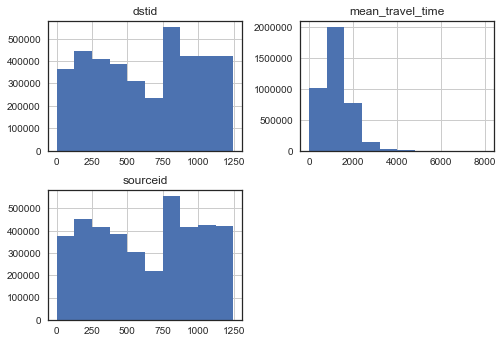

In [85]:
df.hist(column='hod', bins=23)
df[['mean_travel_time','sourceid','dstid']].hist()
plt.show()

# Node Degree

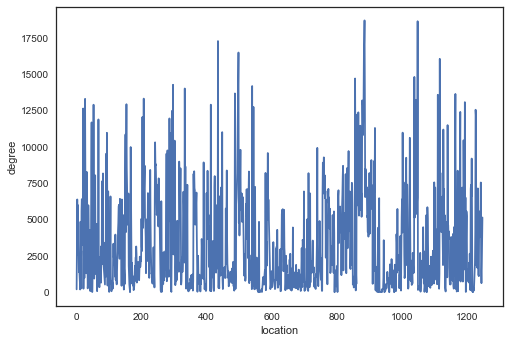

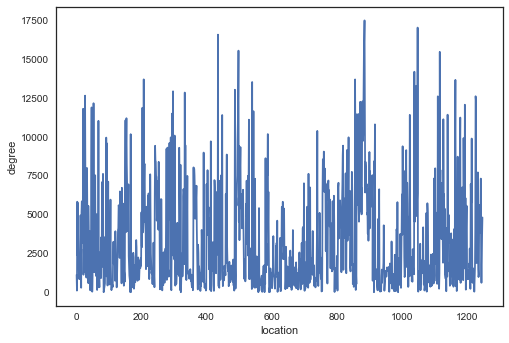

Average ode Degree 8566.761796451927


In [86]:
df = pd.read_csv(path+datasets[0])

degree_dict = dict(df['sourceid'].value_counts())

lists = sorted(degree_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('location')
plt.ylabel('degree')
plt.show()

df['degree_src'] = df['sourceid'].map(lambda x : degree_dict[x])

degree_dict = dict(df['dstid'].value_counts())

lists = sorted(degree_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('location')
plt.ylabel('degree')
plt.show()

df['degree_dst'] = df['dstid'].map(lambda x : degree_dict[x])
df['degree'] = df[['degree_src','degree_dst']].max(axis=1)
print('Average Node Degree', df['degree'].mean())

df.drop(['degree_src','degree_dst'], axis=1,inplace=True)


# Adjacency matrix
The trip data is a record of transportation from one location to another so the resulting adjacency matrix is a directed graph. A matrix representation of trip counts in the dataset. 

In [11]:
A = np.zeros(shape=(df['sourceid'].max(),df['dstid'].max()))
for x in np.array(df[['sourceid','dstid']]):
    A[x[0]-1][x[1]-1] = (A[x[0]-1][x[1]-1]) +1

    #A[x[0]-1][x[1]-1] =1

print(A[:13,:13])


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  24.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  21.   0.   0.   0.   0.   0.   0.   0.  10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 23.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


# Probability Matrix
Using this matrix, we can probabilistically guess the destination of a rider given their location. Unfortunatly the trip data is very sparse. Below is an example of the upper 7x7 matrix.

This is a stochastic or random process otherwise known as a random walk object.

In [49]:
A_sum = A.sum(axis=0)
A_sum[A_sum == 0] = 1

A_prob = A/A_sum
print(A_prob[:7,:7])


#print(A.sum(axis=0))
D = np.diag(A.sum(axis=0))
#print(D)
L = (D-A).astype(int)
#print(L)
# for x in np.array(df[['sourceid','dstid']]):
#     A[x]= A[x]+1
# print(A)

[[ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.00366045  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.0034382   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]]


# Adjacency matrix graph
Graphing the adjacency matrix allows us to visualize its overall structure.
The plot below resembles the preferential attachment mechanism of the Barbasi-Albert model. A few properties of this model:
* scale free - degree distribution follows a power law
* edges contain a high degree

Heavily linked nodes represent the most traveled destinations relations. When a new customer uses the service for the first time, they are more likely to travel to and from one of those more visible destinations rather than with a relative unknown one.

In [14]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

/Users/ahmed/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/ahmed/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/ahmed/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/ahmed/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

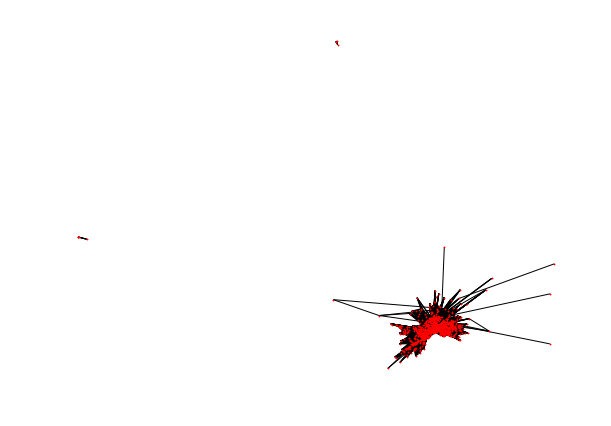

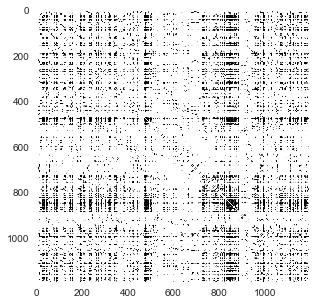

In [15]:
import networkx as nx
G = nx.from_numpy_matrix(A) 

remove = [node for node,degree in G.degree().items() if degree < 1]

G.remove_nodes_from(remove)
nx.draw(G, with_labels=False, node_size = 2, arrows=True)

draw_adjacency_matrix(G)

plt.show()

In [57]:
df['src->dst'] = df['sourceid'].astype(str) +'->'+ df['dstid'].astype(str)
df['dst->src'] = df['dstid'].astype(str) + '->'+ df['sourceid'].astype(str)

# Optimizing ride times

In [69]:
min_times_df = df[['mean_travel_time', 'hod']].groupby(df['src->dst']).min().add_prefix('min_')
min_times_df.sort_index(inplace=True)


print('Unique paths',len(min_times_df))
print(min_times_df.head(20))

# min_times_rev_df = df[['mean_travel_time']].groupby(df['dst->src']).min().add_prefix('min_')
# print(min_times_rev_df.head())

#combined = pd.merge(min_times_df, min_times_rev_df, left_on='src->dst',right_on='dst->src', left_index=True)

#return 0
combined = pd.merge(min_times_df, df, how='left', left_index=True, right_on='src->dst')

#combined['mean_travel_time'] = [['degree_src','degree_dst']].max(axis=1)

combined.sort_index(inplace=True)
#print(combined.head(15))

Unique paths 218042
          min_mean_travel_time  min_hod
src->dst                               
1->1061                 670.33        1
1->12                   190.77        0
1->176                  180.50        0
1->265                  767.83       22
1->379                  354.88        1
1->55                   469.00        1
1->603                  597.36        1
1->610                  363.33        1
1->611                  126.00        0
1->689                  706.57        1
1->943                  792.00        2
1->972                  234.71        1
10->1015                442.77        0
10->1038               2219.88        3
10->1100                880.38        6
10->1111               1063.86        6
10->1112                938.50        5
10->1113                530.53        0
10->1116               2857.50        4
10->1127               1694.00        3


# More Histograms

/Users/ahmed/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


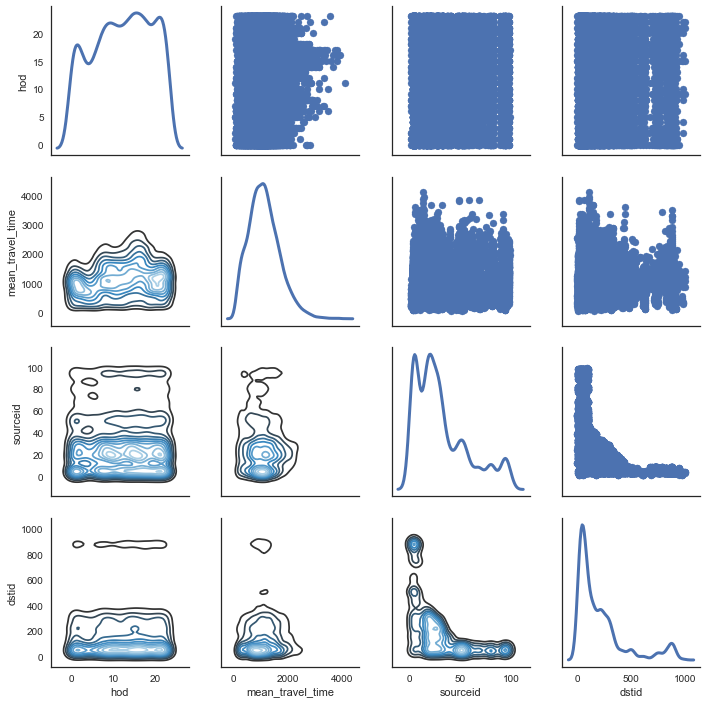

In [25]:
sns.set(style="white")

g = sns.PairGrid(df[['hod','mean_travel_time','sourceid','dstid']].iloc[:10000], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Localization

In [140]:
import itertools

def arrivalTime(top):
    all_combos = list(itertools.combinations(top, 2))
    results = []
    for combo in all_combos:
        result = df['mean_travel_time'][(df.sourceid == combo[0]) & (df.dstid == combo[1])]
        print(len(result))
        if len(result == 0):
            result = df['mean_travel_time'][(df.sourceid == combo[1]) & (df.dstid == combo[0])]
        if len(result == 0):
            result = 2000
        results.append(result)
    return results

       

/Users/ahmed/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/ahmed/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


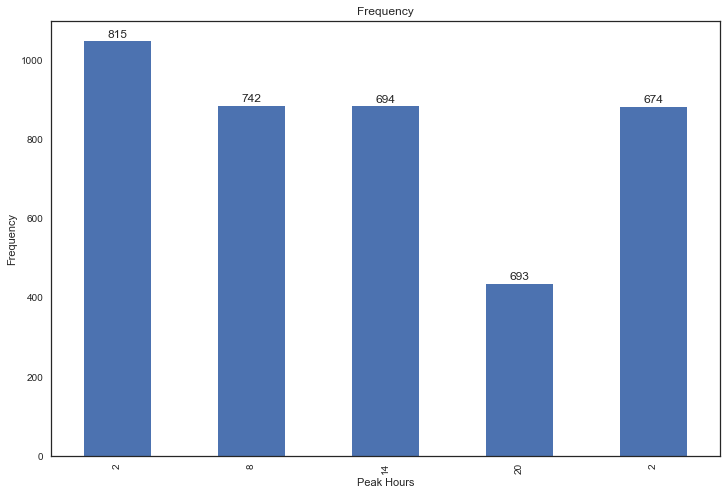

In [150]:
for i in df['hod'].unique():
    df_set = df.loc[df['hod'] == i]
    top = dict(df_set['dstid'].value_counts()[:5])
    #print('Hour',i,'\n', top)
frequencies = list(top.keys())   # bring some raw data

freq_series = pd.Series.from_array(frequencies)   # in my original code I create a series and run on that, so for consistency I create a series from the list.

x_labels = list(df['hod'])

# now to plot the figure...
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title("Frequency")
ax.set_xlabel("Peak Hours")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Now make some labels
labels = [h for h in top.values()]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()
    

# Predicting ride times
Quick shot in the dark at predicting travel times based on source, destination and hour of day. Unfortunately, this is not enough data to accuratly make predictions with.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn import svm, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    df[['sourceid','dstid','hod']], df['mean_travel_time'], test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

regr = linear_model.Ridge(alpha=0.5, fit_intercept=True)


regr = regr.fit(X_train, y_train)

print('Test accuracy',regr.score(X_test, y_test))


y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Test accuracy 0.0155177474739
Coefficients: 
 [  0.05400116   0.05407017  11.14142512]
Mean squared error: 415082.11
Variance score: 0.02
